### Importing Packages

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
from math import sqrt
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Loading & Transforming Data

In [10]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

### Removing Surplus Data

In [11]:
df_comp['market_value'] = df_comp.ftse

In [12]:
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [13]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

### LLR Test

In [44]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### ARIMA Model

<img src = Images/ARIMA-def.png>

<img src = Images/ARIMA.png>

The model targets the difference between the values in period t and the one preceding it. It essentially `estimates the jumps between prices rather than the actual prices.`

The purpose behind this complication of the model is to `ensure stationary no matter the underlying data`. For some types of data, including a single factor of integration, is enough to reach stationary.

### Notation
<img src = Images/ARIMA-notation.png>

### Integration (d)
<img src = Images/ARIMA-integration.png>

##### NOTE - We only rely on integration when our time series doesn't come from a stationary process.

### No Integration (d = 0)
<img src = Images/ARIMA-no-integration.png>

### Intuition
<img src = Images/ARIMA-intuition.png>

### Procedure
<img src = Images/ARIMA-procedure.png>

### ARIMA(1,1,1)

In [18]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49884D+00    |proj g|=  4.53859D-05

At iterate    5    f=  5.49884D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   0.000D+00   5.499D+00
  F =   5.4988363880690203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27598.660
Method:                       css-mle   S.D. of innovations             59.139
Date:                Thu, 20 Jan 2022   AIC                          55205.320
Time:                        17:58:25   BIC                          55231.404
Sample:                    01-11-1994   HQIC                         55214.460
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5667      0.682      0.830      0.406      -0.771       1.904
ar.L1.D.market_value     0.7474      0.070     10.648      0.000       0.610       0.885
ma.L1.D.market_value    -0.7935      0.064    -12.374      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3380           +0.0000j            1.3380            0.0000
MA.1            1.2602           +0.0000j            1.2602            0.0000
-----------------------------------------------------------------------------
"""

<img src = Images/ARIMA-note.png>

### Residuals of the ARIMA(1,1,1)

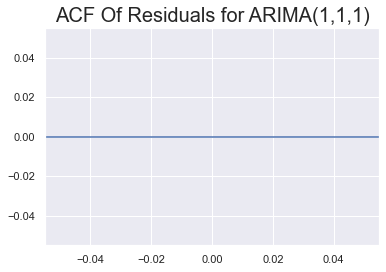

In [20]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1, zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size = 20)
plt.show()

##### NOTE - The above graph indicates that the `ACF failed to compute.` This is due to the missing value at the first element. Snce the ACF starts by trying to compare elements from the very first one going forward, a missing value at the very beginning causes it to break. The easiest way to tackle this problem is to remove the first row of this column using `df = df.iloc[1:]`.


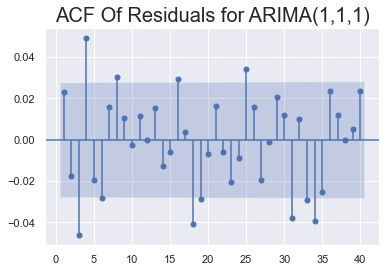

In [21]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,1)", size = 20)
plt.show()

Set of models to choose from are - `[ARIMA(1,1,1); ARIMA(4,1,4)]`

After trial and error methods of all models within the set, we shortlisted the following models as a best fit potential:
1. ARIMA(1,1,2)
2. ARIMA(1,1,3)
3. ARIMA(2,1,1)
4. ARIMA(3,1,1)
5. ARIMA(3,1,2)

In [22]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order = (1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order = (1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order = (2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order = (3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order = (3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags = 5)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49812D+00    |proj g|=  4.41425D-05

At iterate    5    f=  5.49812D+00    |proj g|=  2.81553D-05

At iterate   10    f=  5.49812D+00    |proj g|=  8.97060D-06

At iterate   15    f=  5.49812D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.776D-07   5.498D+00
  F =   5.4981221021342446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49807D+00    |proj g|=  8.20677D-05

At iterate    5    f=  5.49807D+00    |proj g|=  3.73035D-06

At iterate   10    f=  5.49807D+00    |proj g|=  9.85878D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     23      1     0     0   8.882D-08   5.498D+00
  F =   5.4980674043696611     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49652D+00    |proj g|=  4.78728D-05

At iterate    5    f=  5.49652D+00    |proj g|=  2.38032D-05

At iterate   10    f=  5.49652D+00    |proj g|=  1.27010D-05

At iterate   15    f=  5.49652D+00    |proj g|=  3.90799D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     29      1     0     0   2.665D-07   5.497D+00
  F =   5.4965216885792376     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.


In [23]:
print("\n ARMA(1,1,1): \tLL = ", results_ar_1_i_1_ma_1.llf, "\tAIC = ", results_ar_1_i_1_ma_1.aic)
print("\n ARMA(1,1,2): \tLL = ", results_ar_1_i_1_ma_2.llf, "\tAIC = ", results_ar_1_i_1_ma_2.aic)
print("\n ARMA(1,1,3): \tLL = ", results_ar_1_i_1_ma_3.llf, "\tAIC = ", results_ar_1_i_1_ma_3.aic)
print("\n ARMA(2,1,1): \tLL = ", results_ar_2_i_1_ma_1.llf, "\tAIC = ", results_ar_2_i_1_ma_1.aic)
print("\n ARMA(3,1,1): \tLL = ", results_ar_3_i_1_ma_1.llf, "\tAIC = ", results_ar_3_i_1_ma_1.aic)
print("\n ARMA(3,1,2): \tLL = ", results_ar_3_i_1_ma_2.llf, "\tAIC = ", results_ar_3_i_1_ma_2.aic)


 ARMA(1,1,1): 	LL =  -27598.659831718414 	AIC =  55205.31966343683

 ARMA(1,1,2): 	LL =  -27595.074830611775 	AIC =  55200.14966122355

 ARMA(1,1,3): 	LL =  -27585.411591805496 	AIC =  55182.82318361099

 ARMA(2,1,1): 	LL =  -27594.80030253133 	AIC =  55199.60060506266

 ARMA(3,1,1): 	LL =  -27587.042354979196 	AIC =  55186.08470995839

 ARMA(3,1,2): 	LL =  -27585.646797669742 	AIC =  55185.293595339484


#### From the above results, we can say that `ARIMA(1,1,3) COULD BE the best predictor.`

##### NOTE - ARIMA(1,1,1) and ARIMA(1,1,2) are `nested` within ARIMA(1,1,3). Therefore, we need to run the LLR test to check whether it significantly outperforms them or not.

In [24]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_2, model_ar_1_i_1_ma_3)))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49812D+00    |proj g|=  4.41425D-05

At iterate    5    f=  5.49812D+00    |proj g|=  2.81553D-05

At iterate   10    f=  5.49812D+00    |proj g|=  8.97060D-06

At iterate   15    f=  5.49812D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   1.776D-07   5.498D+00
  F =   5.4981221021342446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49620D+00    |proj g|=  3.19744D-05

At iterate    5    f=  5.49620D+00    |proj g|=  2.41585D-05

At iterate   10    f=  5.49620D+00    |proj g|=  4.44089D-07

At iterate   15    f=  5.49620D+00    |proj g|=  5.32907D-07

At iterate   20    f=  5.49620D+00    |proj g|=  3.55271D-07

At iterate   25    f=  5.49620D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

In [25]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_1, model_ar_1_i_1_ma_3, DF = 2)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49884D+00    |proj g|=  4.53859D-05

At iterate    5    f=  5.49884D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   0.000D+00   5.499D+00
  F =   5.4988363880690203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49620D+00    |proj g|=  3.19744D-05

At iterate    5    f=  5.49620D+00    |proj g|=  2.41585D-05

At iterate   10    f=  5.49620D+00    |proj g|=  4.44089D-07

At iterate   15    f=  5.49620D+00    |proj g|=  5.32907D-07

At iterate   20    f=  5.49620D+00    |proj g|=  3.55271D-07

At iterate   25    f=  5.49620D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

##### NOTE - Since LLR test p-value = 0.0 => `Higher complexity is necessary` => `ARIMA(1,1,3) appears to be the best model`

Let's start by examining the ACF of residuals first. `Only if they resemble white noise`, we will proceed with examining and discussing the parameters from the summary table. `Otherwise we'll try to find a better fitting model.`

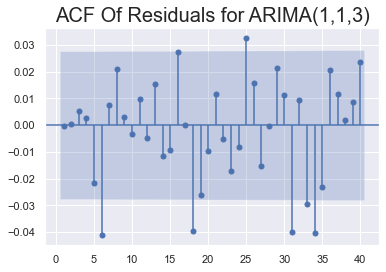

In [33]:
df['res_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(1,1,3)", size = 20)
plt.show()

##### NOTE - The 6th lag is significant in the above graph. Therefore, we need to check `[ARIMA(1,1,1); ARIMA(6,1,6)]`

After trial and error method, we shortlisted the following methods for potential best fits:
1. ARIMA(6,1,3)
2. ARIMA(5,1,1)

In [36]:
model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order = (6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags = 11)

model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order = (5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags = 11)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49446D+00    |proj g|=  4.78817D-04

At iterate    5    f=  5.49446D+00    |proj g|=  6.05738D-04


 This problem is unconstrained.



At iterate   10    f=  5.49446D+00    |proj g|=  4.36184D-04

At iterate   15    f=  5.49444D+00    |proj g|=  6.08580D-04

At iterate   20    f=  5.49444D+00    |proj g|=  1.22569D-05

At iterate   25    f=  5.49444D+00    |proj g|=  1.68487D-04

At iterate   30    f=  5.49444D+00    |proj g|=  2.10498D-05

At iterate   35    f=  5.49444D+00    |proj g|=  6.57252D-06

At iterate   40    f=  5.49444D+00    |proj g|=  8.43769D-06

At iterate   45    f=  5.49444D+00    |proj g|=  2.42473D-05

At iterate   50    f=  5.49444D+00    |proj g|=  1.51879D-05

At iterate   55    f=  5.49444D+00    |proj g|=  2.44249D-05

At iterate   60    f=  5.49444D+00    |proj g|=  1.73195D-05

At iterate   65    f=  5.49444D+00    |proj g|=  7.81597D-06

At iterate   70    f=  5.49444D+00    |proj g|=  2.13163D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49542D+00    |proj g|=  6.82121D-05

At iterate    5    f=  5.49542D+00    |proj g|=  8.34888D-06

At iterate   10    f=  5.49542D+00    |proj g|=  2.21156D-05

At iterate   15    f=  5.49542D+00    |proj g|=  7.99361D-07

At iterate   20    f=  5.49542D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     33      1     0     0   2.665D-07   5.495D+00
  F =   5.4954180640106403     

CONVERG

In [39]:
print("\n ARMA(1,1,3): \tLL = ", results_ar_1_i_1_ma_3.llf, "\tAIC = ", results_ar_1_i_1_ma_3.aic)
print("\n ARMA(5,1,1): \tLL = ",results_ar_5_i_1_ma_1.llf, "\tAIC = ", results_ar_5_i_1_ma_1.aic)
print("\n ARMA(6,1,3): \tLL = ",results_ar_6_i_1_ma_3.llf, "\tAIC = ", results_ar_6_i_1_ma_3.aic)


 ARMA(1,1,3): 	LL =  -27585.411591805496 	AIC =  55182.82318361099

 ARMA(5,1,1): 	LL =  -27581.503263269406 	AIC =  55179.00652653881

 ARMA(6,1,3): 	LL =  -27576.588189456565 	AIC =  55175.17637891313


#### Conclusion - `ARIMA(6,1,3)` is the best predictor.

##### NOTE - Since ARIMA(1,1,3) and ARIMA(5,1,1) are nested within ARIMA(6,1,3), we need to do the LLR test to make sure that the complexity is worth it.

In [46]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_1_i_1_ma_3, model_ar_6_i_1_ma_3, DF = 5)))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49620D+00    |proj g|=  3.19744D-05

At iterate    5    f=  5.49620D+00    |proj g|=  2.41585D-05

At iterate   10    f=  5.49620D+00    |proj g|=  4.44089D-07

At iterate   15    f=  5.49620D+00    |proj g|=  5.32907D-07

At iterate   20    f=  5.49620D+00    |proj g|=  3.55271D-07

At iterate   25    f=  5.49620D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49446D+00    |proj g|=  4.77396D-04


 This problem is unconstrained.



At iterate    5    f=  5.49446D+00    |proj g|=  6.02363D-04

At iterate   10    f=  5.49446D+00    |proj g|=  4.45599D-04

At iterate   15    f=  5.49444D+00    |proj g|=  6.01030D-04

At iterate   20    f=  5.49444D+00    |proj g|=  1.11022D-05

At iterate   25    f=  5.49444D+00    |proj g|=  1.72218D-04

At iterate   30    f=  5.49444D+00    |proj g|=  1.03650D-04

At iterate   35    f=  5.49444D+00    |proj g|=  1.70530D-05

At iterate   40    f=  5.49444D+00    |proj g|=  9.05942D-06

At iterate   45    f=  5.49444D+00    |proj g|=  8.08242D-06

At iterate   50    f=  5.49444D+00    |proj g|=  4.86722D-05

At iterate   55    f=  5.49444D+00    |proj g|=  2.28262D-05

At iterate   60    f=  5.49444D+00    |proj g|=  2.30926D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

In [47]:
print("\nLLR test p-value = " + str(LLR_test(model_ar_5_i_1_ma_1, model_ar_6_i_1_ma_3, DF = 3)))

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49542D+00    |proj g|=  6.83009D-05

At iterate    5    f=  5.49542D+00    |proj g|=  7.81597D-06

At iterate   10    f=  5.49542D+00    |proj g|=  1.41220D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     14     22      1     0     0   3.553D-07   5.495D+00
  F =   5.4954180641300159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49446D+00    |proj g|=  4.77396D-04

At iterate    5    f=  5.49446D+00    |proj g|=  6.02363D-04

At iterate   10    f=  5.49446D+00    |proj g|=  4.45599D-04

At iterate   15    f=  5.49444D+00    |proj g|=  6.01030D-04

At iterate   20    f=  5.49444D+00    |proj g|=  1.11022D-05

At iterate   25    f=  5.49444D+00    |proj g|=  1.72218D-04

At iterate   30    f=  5.49444D+00    |proj g|=  1.03650D-04

At iterate   35    f=  5.49444D+00    |proj g|=  1.70530D-05

At iterate   40    f=  5.49444D+00    |proj g|=  9.05942D-06

At iterate   45    f=  5.49444D+00    |proj g|=  8.08242D-06

At iterate   50    f=  5.49444D+00    |proj g|=  4.86722D-05

At iterate   55    f=  5.49444D+00    |proj g|=  2.28262D-05

At iterate   60    f=  5.49444D+00    |proj g|=  2.30926D-06

           * * *

Tit   = 

#### `Since, LLR test p-value < 5 % significance, the higher complexity is rationalized.` Therefore, `ARIMA(6,1,3)` is the best predictor.

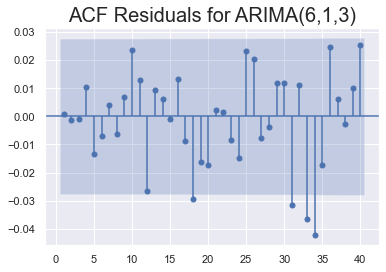

In [51]:
df['res_ar_6_i_1_ma_3'] = results_ar_6_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_6_i_1_ma_3[1:], zero = False, lags = 40)
plt.title("ACF Residuals for ARIMA(6,1,3)", size = 20)
plt.show()

### Models with Higher Levels of Integration

#### How do we know if the integrated data set is stationary?
1. Manually create an integrated version of the original time series.
2. Use the Augmented Dickey Fuller test.

`.diff(1)` -> Differences between values 1 period apart.

In [53]:
df['delta_prices'] = df.market_value.diff(1)

In [54]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order = (1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
results_delta_ar_1_i_1_ma_1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49884D+00    |proj g|=  4.53859D-05

At iterate    5    f=  5.49884D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   0.000D+00   5.499D+00
  F =   5.4988363880690203     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5019
Model:                     ARMA(1, 1)   Log Likelihood              -27598.660
Method:                       css-mle   S.D. of innovations             59.139
Date:                Thu, 20 Jan 2022   AIC                          55205.320
Time:                        19:28:48   BIC                          55231.404
Sample:                    01-11-1994   HQIC                         55214.460
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5667      0.682      0.830      0.406      -0.771       1.904
ar.L1.delta_prices     0.7474      0.070     10.648      0.000       0.610       0.885
ma.L1.delta_prices    -0.7935      0.064    -12.374      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3380           +0.0000j            1.3380            0.0000
MA.1            1.2602           +0.0000j            1.2602            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
sts.adfuller(df.delta_prices[1:])

(-32.238943106931366,
 0.0,
 5,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 54834.31732499655)

`-32.238943106931366 < 10% significance value` & `P value = 0` => Therefore, it is `stationary data`

<img src = Images/ARIMA111.png>
##### NOTE - Summary tables of ARIMA(1,1,1) and ARMA(1,1) are identical.

This means that there is `no need of additional layers of integration.`

### Issues with ARIMA Model

1. More and more `computationally expensive.`
2. `Transform the data several times`.
3. `Differentiate the values from zero`.
4. Margin of something being significant or insignificant becomes `narrow` and this can lead to some models `failing to converge even after many iterations.`
5. When the numbers are `too small`, we may encounter `numeric instability.` 
For example - 0.0000000... = 0 (approx) -> Leads to loss of information.
6. The more layers we add, the harder it is to interpret the results.

### MAX Models
A model that takes into account more than just past prices or past residuals.

#### ARMAX - Non-integrated

<img src = Images/ARIMAX-eq.png>
<img src = Images/ARIMAX-eq1.png>

##### NOTE - X -> exogeneous variable => `exog`

`exog = array_type` -> The values need to be in array type since we want values from every time period.


#### ARIMAX - Integrated